In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Crop_recommendation.csv")

In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
df['label']

0         rice
1         rice
2         rice
3         rice
4         rice
         ...  
2195    coffee
2196    coffee
2197    coffee
2198    coffee
2199    coffee
Name: label, Length: 2200, dtype: object

In [5]:
df['label'] = df['label'].astype('category')

# EDA

In [6]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.shape

(2200, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   N            2200 non-null   int64   
 1   P            2200 non-null   int64   
 2   K            2200 non-null   int64   
 3   temperature  2200 non-null   float64 
 4   humidity     2200 non-null   float64 
 5   ph           2200 non-null   float64 
 6   rainfall     2200 non-null   float64 
 7   label        2200 non-null   category
dtypes: category(1), float64(4), int64(3)
memory usage: 123.3 KB


In [10]:
df.shape

(2200, 8)

In [9]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


A continuación se realiza una gráfico de boxplot para observar los outliers de cada variable. Esto es importante ya que al hacer uso de ciertas técncias de reducción de dimensiones debemos realizar un correcto tratamiento de los valores atípicos, ya que se puede afectar el resultado.

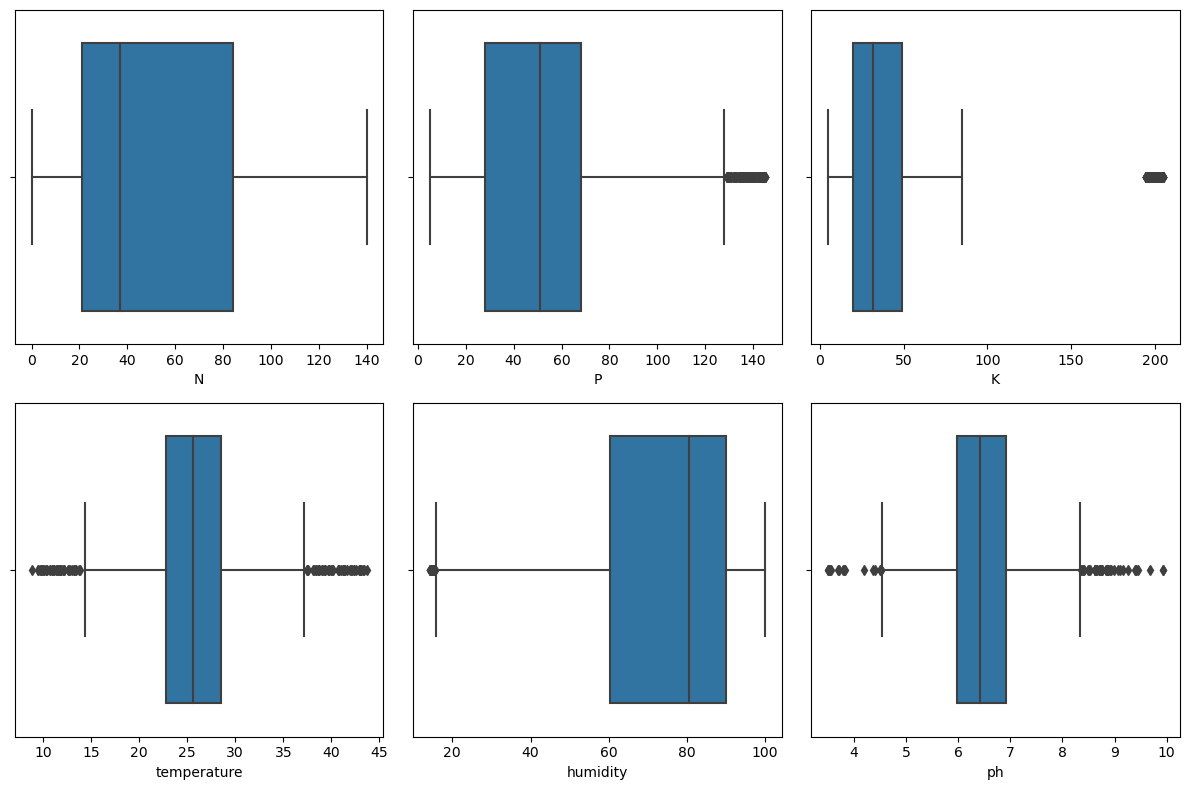

In [11]:
fig,ax = plt.subplots(2,3, figsize=(12,8))
sns.boxplot(data=df, x='N',ax=ax[0,0])
sns.boxplot(data=df, x='P',ax=ax[0,1])
sns.boxplot(data=df, x='K',ax=ax[0,2])
sns.boxplot(data=df, x='temperature',ax=ax[1,0])
sns.boxplot(data=df, x='humidity',ax=ax[1,1])
sns.boxplot(data=df, x='ph', ax=ax[1,2])
fig.tight_layout()
plt.show()

Como observamos, todas las variables menos N poseen valores atípicos, aunque quizá los casos más graves sean los del potasio (K) y el ph, cuyos outliers exceden por mucho los valores comunes.
A la vez, podemos observar cómo cada variable posee una escala distinta y, al haber tanta diferencia entre unas y otras, lo ideal será realizar la normalización de los datos posteriormente.

Para observar la relación que hay entre las diferentes variables, realizamos el siguiente mapa de calor o heatmap.

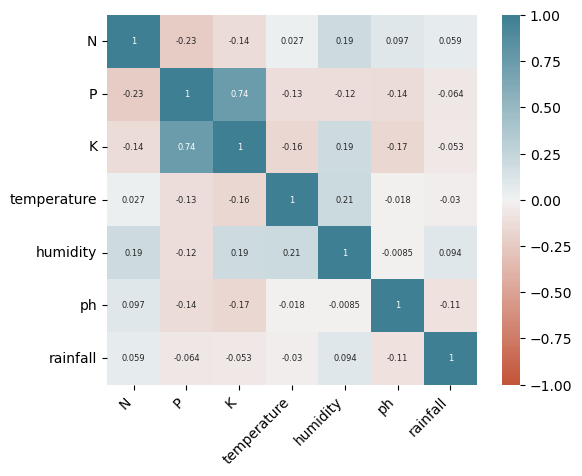

In [13]:
corr = df.drop(['label'], axis=1).corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

Gracias al heatmap, observamos que las variables que se hallan más relacionadas son el potasio (K) y el fósforo (P). A continuación ilustraremos su relación directamente proporcional:

<Axes: xlabel='P', ylabel='K'>

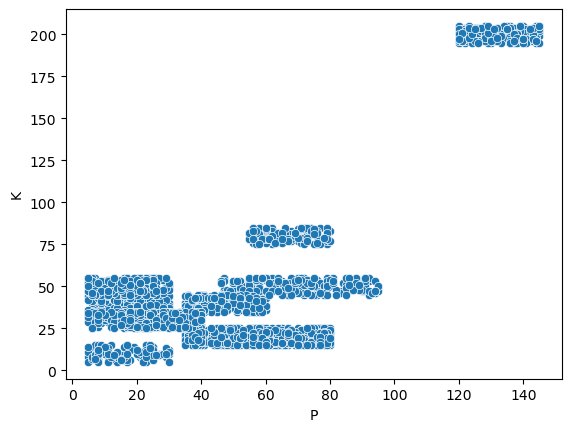

In [14]:
sns.scatterplot(data=df, x='P', y='K')

Sin embargo, si queremos seleccionar las variables más importantes para reducir la dimensionalidad de nuestro dataset o para visualizarlas, lo correcto es llevar a cabo el método del análisis de componentes principales (PCA).

# PCA

Antes de llevar a cabo PCA, se realizará un tratamiento de los outliers de potasio y ph

<Axes: xlabel='K'>

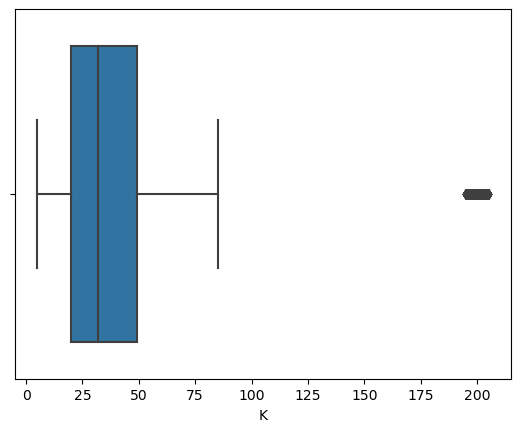

In [15]:
sns.boxplot(data = df, x='K')

In [16]:
cant_Outliers = df[df['K']>100]['K'].count()

In [17]:
cant_No_Outliers = df[df['K']<100]['K'].count()

In [18]:
proporcion_outliers_respecto_total = cant_Outliers/cant_No_Outliers
proporcion_outliers_respecto_total

0.1

Nuestros outliers en potasio representan un 10% de los datos totales.
Sin embargo, no parece que estos datos sean un error, sino más bien una característica del elemento muestrado. Por esta razón, estos outliers no serán eliminados ni reemplazados

<Axes: xlabel='ph'>

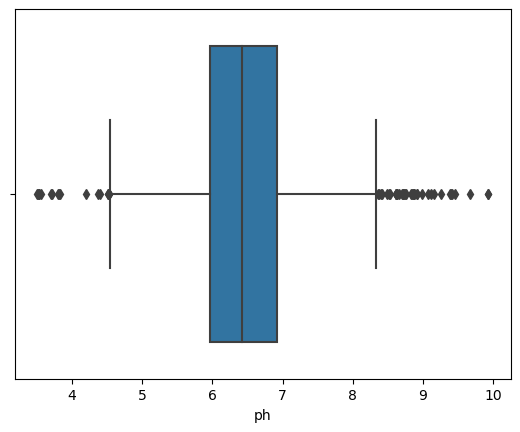

In [40]:
sns.boxplot(data=df, x='ph')

In [41]:
df[(df['ph']<4.5) | (df['ph']>8.5)]

,N,P,K,temperature,humidity,ph,rainfall,label
209,28,74,81,18.012723,18.309681,8.753795,81.985688,chickpea
210,58,66,79,20.993736,19.334704,8.718193,93.552801,chickpea
222,31,78,76,17.572121,14.999275,8.519976,89.310507,chickpea
232,32,60,83,19.691417,19.442254,8.829273,91.760716,chickpea
233,22,78,76,17.848517,19.091729,8.621663,76.324707,chickpea
240,38,60,76,18.650541,17.808524,8.868741,77.927987,chickpea
241,59,55,79,20.367204,16.895743,8.766129,82.254558,chickpea
242,36,76,75,18.381204,16.638052,8.736338,70.520567,chickpea
288,53,65,76,20.191378,16.419983,8.719961,77.337954,chickpea
295,57,56,78,17.341502,18.756263,8.861480,67.954543,chickpea


En el caso del ph es el mismo escenario.

## Estandarizacion de los datos

In [36]:
#otro escalado
df_sub = df.drop(['label'], axis=1)
df_std = (df_sub-df_sub.mean())/df_sub.std()

In [37]:
df_std

,N,P,K,temperature,humidity,ph,rainfall
0,1.068554,-0.344472,-0.101664,-0.935374,0.472559,0.043292,1.809949
1,0.933117,0.140584,-0.141153,-0.759473,0.396961,0.734706,2.241548
2,0.255928,0.049636,-0.081920,-0.515781,0.486843,1.771108,2.920402
3,0.635154,-0.556684,-0.160897,0.172768,0.389717,0.660158,2.536471
4,0.743504,-0.344472,-0.121409,-1.083401,0.454688,1.497527,2.897714
...,...,...,...,...,...,...,...
2195,1.529043,-0.587000,-0.318850,0.228762,-0.227657,0.401303,1.352129
2196,1.312342,-1.163004,-0.417571,0.355639,-0.666796,-0.494300,0.445081
2197,1.827006,-0.617316,-0.358338,-0.293152,-0.191192,-0.138089,1.271129
2198,1.799918,-0.647632,-0.279362,0.129583,-0.869320,0.373819,0.431447


# PCA

In [ ]:
pca = PCA(n_components=df_sub.shape[1])

pca_features=pca.fit_transform(df_std)

In [ ]:
#PC DATAFRAME
pca_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7']
)

pca_df['label'] = df['label']

In [ ]:
pca_df

Seleccion numero de componentes principales

In [ ]:
pca.explained_variance_ratio_

In [ ]:
def acumular(componentes):
    sum = 0
    var_c = []
    for componente in componentes:
        sum+=componente
        var_c.append(sum)
    return var_c

In [ ]:
var_c = acumular(pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':pca.explained_variance_, 
                        'Proporción de variancia explicada':pca.explained_variance_ratio_, 
                        'Proporción acumulado de variancia explicada': var_c})
pca_rtd

In [ ]:
plt.bar(range(1,8), pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(pca.explained_variance_ratio_),
         where='mid',
         color='red')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='steelblue')
plt.title('Scree Plot')
plt.xlabel('Componentes principales')
plt.ylabel('Proporción de variancia explicada')
plt.show()

In [ ]:
corr = pca_df[['PC1', 'PC2', 'PC3','PC4']].corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [ ]:
features = df.drop(columns=['label']).columns.to_list()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_df["label"],  labels={'color': 'label'} )
fig.update_layout(title = "Biplot",width = 1200,height = 600)
fig.show()
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
              color=pca_df["label"],  labels={'color': 'label'})
fig.show()